### Using a Python programming language build a binary logistic regression (Fitting/Training) model. Also Interpreted the Model Summary and Model Evaluation on Test data Set.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
diabetes = pd.read_csv(r'Dataset/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diabetes, test_size=0.20, random_state = 42)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [8]:
formula = ('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age')
model = logit(formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2752
Time:                        07:34:16   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.0359      0.837    -10.802      0.000     -10.675      -7.396
Pregnancies                  0.0645      0.036      1.791      0.073      -0.006       0.135
Glucose                      0.0341      0.004      8.055      0.000       0.026       0.042
BloodPressure               -0.0139      0.006     -2.260      0.024      -0.026      -0.002
SkinThickness                0.0031      0.008      0.397      0.691      -0.012       0.019
Insulin                     -0.0018      0.001     -1.782      0.075      -0.004       0.000
BMI                          0.1026      0.017      5.948      0.000       0.069       0.136
DiabetesPedigreeFunction     0.6945      0.330      2.107      0.035       0.049       1.341
Age                          0.0371      0.011      3.400      0.001       0.016       0.058
============================================================================================
"""

In [10]:
import numpy as np
from sklearn.metrics import classification_report,accuracy_score

In [12]:
prediction = model.predict(exog = test_data)
cutoff = 0.5
y_prediction = np.where(prediction>cutoff,1,0)
y_actual = test_data["Outcome"]

In [13]:
cm = pd.crosstab(y_actual, y_prediction, rownames = ['Actual'],
                colnames = ["Predicted"], margins = True)
print(cm)

Predicted   0   1  All
Actual                
0          79  20   99
1          18  37   55
All        97  57  154


In [14]:
acc = accuracy_score(y_actual, y_prediction)
print('Accuracy: %.2f' % acc + "%")

Accuracy: 0.75%


In [15]:
cr=classification_report(y_actual, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



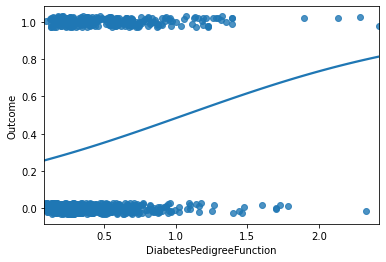

In [17]:
sns.regplot(x = "DiabetesPedigreeFunction", y = "Outcome", y_jitter = 0.03,
           data = diabetes, logistic = True, ci = None)
plt.show()